## AFL2 Data Mining - Christian (0706022110005)
### Data Cleaning and Preparation

In [404]:
import pandas as pd
df = pd.read_csv('customer_analysis.csv', delimiter='\t')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [405]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

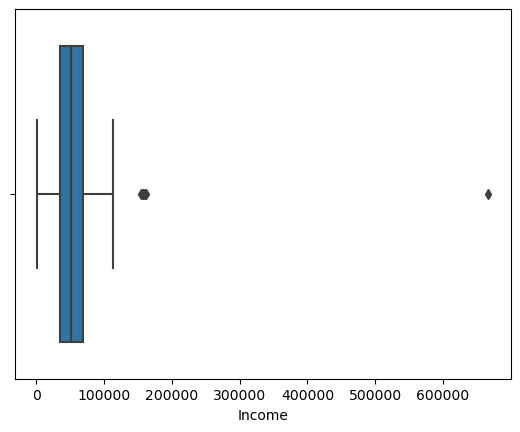

In [406]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df['Income'])
plt.xlabel('Income')
plt.show()

In [407]:
# Income di isi dengan mean karena distribusi normal
df['Income'].fillna(df['Income'].mean(), inplace=True)

# Ubah tipe data Dt_Customer menjadi datetime
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')

#Categorical value
print(df['Marital_Status'].unique())
print(df['Education'].unique())

['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']
['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']


In [408]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [409]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

### Feature Engineering

In [410]:
from datetime import datetime
import numpy as np

df['Age'] = datetime.now().year - df['Year_Birth']
df['Spent'] = df.iloc[:, 9:15].sum(axis=1)
df['Living_With'] = df["Marital_Status"].replace({"Married":"Couple",
                                                  "Together":"Couple",
                                                  "Absurd":"Alone",
                                                  "Widow":"Alone",
                                                  "YOLO":"Alone",
                                                  "Divorced":"Alone", 
                                                  "Single":"Alone",})
df['Children'] = df['Kidhome'] + df['Teenhome']
df['Family_Size'] = df['Children'] + np.where(df['Living_With'] == "Alone", 1, 2)
df['Is_Parent'] = np.where(df['Children'] > 0, 1, 0)
df['Education'] = df['Education'].replace({"Basic":"Undergraduate",
                                           "2n Cycle":"Undergraduate",
                                           "Graduation":"Graduate", 
                                           "Master":"Postgraduate", 
                                           "PhD":"Postgraduate"})
df.drop(columns=['ID', 'Year_Birth', 'Marital_Status', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Z_CostContact', 'Z_Revenue'], axis=1, inplace=True)

In [411]:
df.head()

,Education,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,Graduate,58138.0,58,635,88,546,172,88,88,3,...,0,0,0,1,66,1617,Alone,0,1,0
1,Graduate,46344.0,38,11,1,6,2,1,6,2,...,0,0,0,0,69,27,Alone,2,3,1
2,Graduate,71613.0,26,426,49,127,111,21,42,1,...,0,0,0,0,58,776,Couple,0,2,0
3,Graduate,26646.0,26,11,4,20,10,3,5,2,...,0,0,0,0,39,53,Couple,1,3,1
4,Postgraduate,58293.0,94,173,43,118,46,27,15,5,...,0,0,0,0,42,422,Couple,1,3,1


In [412]:
df.columns

Index(['Education', 'Income', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Age', 'Spent', 'Living_With',
       'Children', 'Family_Size', 'Is_Parent'],
      dtype='object')

### Data Preparation

In [413]:
from sklearn.preprocessing import LabelEncoder

le1 = LabelEncoder().fit(df['Education'])
df['Education'] = le1.transform(df['Education'])

le2 = LabelEncoder().fit(df['Living_With'])
df['Living_With'] = le2.transform(df['Living_With'])

In [414]:
from sklearn.preprocessing import StandardScaler

dfs = StandardScaler().fit_transform(df)

In [415]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
dfs_pca = pd.DataFrame(pca.fit_transform(dfs), columns=['col1', 'col2'])
dfs_pca.head()

,col1,col2
0,4.775306,-0.415127
1,-2.650794,-0.342158
2,2.084792,-0.501648
3,-2.559735,-0.720583
4,-0.641578,0.877519


### Clustering

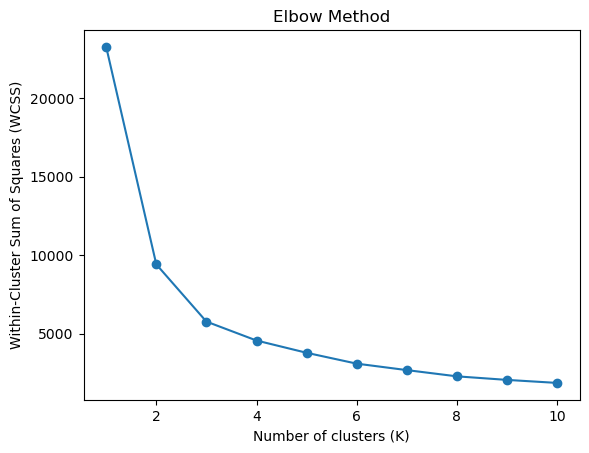

In [416]:
from sklearn.cluster import KMeans

wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, n_init=5, max_iter=500, random_state=0)
    kmeans.fit(dfs_pca)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o', linestyle='-')
plt.title('Elbow Method')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()

In [417]:
from kneed import KneeLocator

findknee = KneeLocator(range(1, 11),
                       wcss,
                       curve="convex",
                       direction="decreasing")

print('the best cluster for your model is', findknee.elbow)

the best cluster for your model is 3


In [418]:
from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters=3, metric='euclidean')
df['Cluster'] = ac.fit_predict(dfs_pca)
dfs_pca['Cluster'] = ac.fit_predict(dfs_pca)

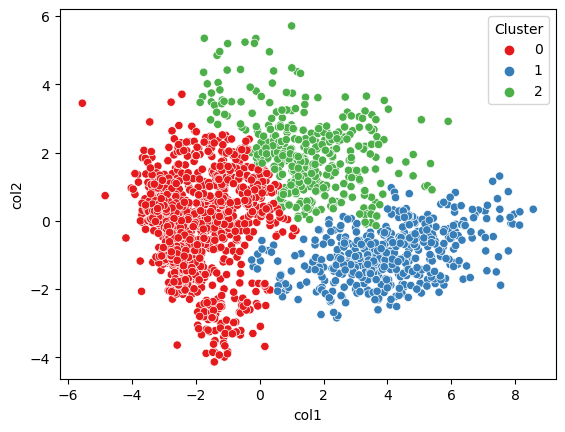

In [419]:
sns.scatterplot(data=dfs_pca, x='col1', y='col2', hue='Cluster', palette='Set1')
plt.show()

### Visualization

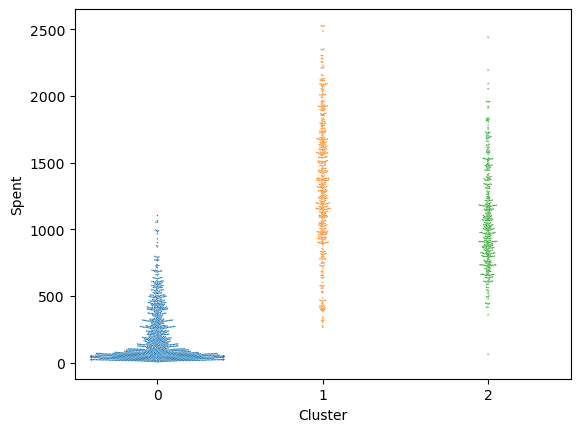

In [420]:
sns.swarmplot(data=df, x='Cluster', y='Spent', size=1)
plt.show()

In [ ]:
sns.swarmplot(data=df, x='Cluster', y='Income', size=1)
plt.ylim(0, 120000)
plt.show()

In [ ]:
sns.boxenplot(data=df, x='Cluster', y='Spent')
plt.show()

In [ ]:
sns.boxenplot(data=df, x='Cluster', y='Income')
plt.ylim(0, 120000)
plt.show()

In [ ]:
sns.countplot(x=df["Cluster"])
plt.title("Distribution Of The Clusters")
plt.show()

In [ ]:
sns.scatterplot(data=df, x='Spent', y='Income', hue='Cluster')
plt.ylim(0, 120000)
plt.xlabel('Income')
plt.ylabel('Spending')
plt.title('Relation Between Income and Spending')
plt.show()